In [1]:
import os 
import sys
from tqdm import tqdm
import pickle
import importlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

module_path = '/home/lun/project-basileus/seq-gan/sgtlstm'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
if 'sgtlstm' in sys.modules:
    importlib.reload(sys.modules['sgtlstm'])

from sgtlstm.utils import load_fixed_length_sequence_from_pickle, create_dataset, recover_timedelta_to_timestamp
from sgtlstm.SeqGan import build_G, build_D
from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3
from sgtlstm.train import generate_one_sequence_by_rollout, train_discriminator, train_generator

## Load data 

In [3]:
valid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/valid_sequences.pickle'
invalid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/invalid_sequences.pickle'

valid_event_type_seqs, valid_timestamp_seqs = load_fixed_length_sequence_from_pickle(valid_data_path, to_timedelta=True, end_token=0)
invalid_event_type_seqs, invalid_timestamp_seqs = load_fixed_length_sequence_from_pickle(invalid_data_path, to_timedelta=True, end_token=0)

## Global Variables 

In [4]:
BATCH_SIZE = 128
T = 10 + 1
VOCAB = ['END/PADDING', 'INIT', 'start', 'click', 'install']
EVENT_VOCAB_DIM = len(VOCAB)
EMB_DIM = 5
HIDDEN_DIM = 64
K_MIST = 2

END_TOKEN = 0
MAX_TIME = 1024

## Load pretrained model

In [5]:
discriminator = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)
discriminator.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))

D_save_path = './gan_model_weights/pretrain_40000_disc/model.tf'
discriminator.load_weights(D_save_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [6]:
generator = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)
generator.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))

G_save_path = './gan_model_weights/pretrain_20000_gen_clip/model.tf'
generator.load_weights(G_save_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
sigma > 1 !!


In [7]:
N_gen = 10 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    print(i)
    print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 0/10 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

 10%|█         | 1/10 [00:01<00:09,  1.08s/it]

0
[(1.0, 0), (2.0, 1.0), (3.0, 9.913615051360832), (4.0, 20.800728361931075), (2.0, 33.2846395104324), (3.0, 37.34111941996129), (4.0, 41.37356093021957), (3.0, 53.979064650097236), (3.0, 66.20475907137045), (4.0, 70.51245863083899), (4.0, 84.0172910173811)]


 20%|██        | 2/10 [00:01<00:07,  1.06it/s]

1
[(1.0, 0), (2.0, 1.2061133073772787), (3.0, 2.2061133073772785), (2.0, 3.2061133073772785), (3.0, 4.2061133073772785), (2.0, 15.43072377411734), (4.0, 29.883105937617017), (3.0, 42.99292357165418), (3.0, 55.37147614272978), (2.0, 68.70465687255646), (4.0, 81.35727128681648)]


 30%|███       | 3/10 [00:02<00:05,  1.19it/s]

2
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 11.07761042012161), (3.0, 23.233508559738034), (3.0, 26.78921609583423), (4.0, 30.228689894966447), (2.0, 43.977893577464286), (3.0, 57.31659973588357), (3.0, 69.99713857781815), (4.0, 75.60911138029661)]


 40%|████      | 4/10 [00:02<00:04,  1.30it/s]

3
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 13.535106095659572), (3.0, 26.058330975924186), (3.0, 37.77047374007543), (2.0, 43.19512688278911), (2.0, 53.97684088502084), (4.0, 65.85877644074988), (2.0, 70.0003983757588), (3.0, 83.67176016695679)]


 50%|█████     | 5/10 [00:03<00:03,  1.38it/s]

4
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (3.0, 3.9038367188549143), (2.0, 7.317984566850521), (4.0, 17.145044764789585), (3.0, 20.25482408471887), (4.0, 23.817201539108787), (3.0, 29.158376989025065), (4.0, 35.32281523904856), (3.0, 38.81243382144494)]


 60%|██████    | 6/10 [00:04<00:02,  1.45it/s]

5
[(1.0, 0), (2.0, 1.0), (3.0, 8.841020900407774), (2.0, 19.95711679887275), (3.0, 32.99130082765713), (2.0, 35.74774631802159), (3.0, 38.51901691474337), (2.0, 40.73494470199712), (4.0, 47.35077702200068), (4.0, 50.8671745980274), (3.0, 57.70572573433507)]


 70%|███████   | 7/10 [00:04<00:01,  1.51it/s]

6
[(1.0, 0), (2.0, 1.0), (2.0, 9.92222883303374), (3.0, 10.92222883303374), (4.0, 23.42756194945769), (3.0, 28.43436670849684), (2.0, 33.3908202385347), (4.0, 47.63573811282102), (3.0, 62.08020705052108), (4.0, 75.9999202558897), (3.0, 90.0737549492713)]


 80%|████████  | 8/10 [00:05<00:01,  1.56it/s]

7
[(1.0, 0), (2.0, 1.0), (3.0, 8.27132036054956), (3.0, 18.94593381160682), (3.0, 31.61927813295376), (4.0, 42.892227720512466), (3.0, 56.69697728529422), (2.0, 58.89202979357257), (2.0, 65.1737722790658), (3.0, 78.00973918522693), (2.0, 83.89559822326855)]


 90%|█████████ | 9/10 [00:05<00:00,  1.60it/s]

8
[(1.0, 0), (2.0, 1.0), (3.0, 10.12215184360165), (2.0, 21.988807643163298), (3.0, 33.54111397099282), (3.0, 35.95143594772778), (3.0, 39.35064183026095), (2.0, 44.16844284595679), (3.0, 49.00189734199833), (3.0, 62.041512907138085), (2.0, 66.42002067673738)]


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

9
[(1.0, 0), (2.0, 1.0), (3.0, 7.546008194516951), (4.0, 18.607481372966934), (2.0, 29.106887155107017), (4.0, 41.86244105160432), (3.0, 54.51223352472043), (3.0, 57.72691395102024), (4.0, 62.29982514556515), (4.0, 69.33867737068731), (2.0, 75.71942828941405)]


# Train G and D for 1 epochs

In [8]:
train_et = valid_event_type_seqs
train_ts = valid_timestamp_seqs

train_labels = np.ones((valid_event_type_seqs.shape[0], 1))

train_features = (train_et, train_ts)
N_train = train_et.shape[0]

In [11]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=2,
                         buffer_size=N_train)

gen_token_loss_history = []
gen_gaussian_loss_history = []

disc_token_loss_history = []
disc_gaussian_loss_history = []

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1

In [12]:
_TOTAL_STEPS = 80

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Instructions for updating:
Use tf.identity instead.


1it [01:52, 112.91s/it]

Training Step: 2


2it [03:39, 110.99s/it]

Training Step: 3


3it [05:26, 109.71s/it]

Training Step: 4


4it [07:14, 109.36s/it]

Training Step: 5


5it [09:00, 108.31s/it]

Training Step: 6


6it [10:46, 107.68s/it]

Training Step: 7


7it [12:32, 107.22s/it]

Training Step: 8


8it [14:18, 106.89s/it]

Training Step: 9


9it [16:04, 106.55s/it]

Training Step: 10


10it [17:52, 106.84s/it]

Training Step: 11


11it [19:37, 106.45s/it]

Training Step: 12


12it [21:23, 106.27s/it]

Training Step: 13


13it [23:09, 106.23s/it]

Training Step: 14


14it [24:57, 106.71s/it]

Training Step: 15


15it [26:43, 106.33s/it]

Training Step: 16


16it [28:29, 106.32s/it]

Training Step: 17


17it [30:15, 106.15s/it]

Training Step: 18


18it [32:01, 106.15s/it]

Training Step: 19


19it [33:47, 106.10s/it]

Training Step: 20


20it [35:36, 106.94s/it]

Training Step: 21


21it [37:23, 107.21s/it]

Training Step: 22


22it [39:09, 106.58s/it]

Training Step: 23


23it [40:56, 106.73s/it]

Training Step: 24


24it [42:41, 106.39s/it]

Training Step: 25


25it [44:29, 106.68s/it]

Training Step: 26


26it [46:15, 106.61s/it]

Training Step: 27


27it [48:02, 106.58s/it]

Training Step: 28


28it [49:49, 106.73s/it]

Training Step: 29


29it [51:37, 107.10s/it]

Training Step: 30


30it [53:24, 107.04s/it]

Training Step: 31


31it [55:10, 106.78s/it]

Training Step: 32


32it [56:56, 106.77s/it]

Training Step: 33


33it [58:45, 107.42s/it]

Training Step: 34


34it [1:00:31, 106.90s/it]

Training Step: 35


35it [1:02:18, 106.89s/it]

Training Step: 36


36it [1:04:04, 106.50s/it]

Training Step: 37


38it [1:07:38, 106.72s/it]

Training Step: 39


39it [1:09:26, 106.96s/it]

Training Step: 40


40it [1:11:11, 106.53s/it]

Training Step: 41


41it [1:12:58, 106.59s/it]

Training Step: 42


42it [1:14:47, 107.36s/it]

Training Step: 43


43it [1:16:33, 106.90s/it]

Training Step: 44


44it [1:18:20, 107.06s/it]

Training Step: 45


45it [1:20:06, 106.72s/it]

Training Step: 46


46it [1:21:52, 106.43s/it]

Training Step: 47


47it [1:23:38, 106.45s/it]

Training Step: 48


48it [1:25:25, 106.54s/it]

Training Step: 49


49it [1:27:13, 106.85s/it]

Training Step: 50


50it [1:28:59, 106.82s/it]

Training Step: 51


51it [1:30:47, 106.93s/it]

Training Step: 52


52it [1:32:34, 107.01s/it]

Training Step: 53


53it [1:34:21, 107.07s/it]

Training Step: 54


54it [1:36:07, 106.72s/it]

Training Step: 55


55it [1:37:53, 106.43s/it]

Training Step: 56


56it [1:39:39, 106.49s/it]

Training Step: 57


57it [1:41:27, 106.98s/it]

Training Step: 58


58it [1:43:13, 106.63s/it]

Training Step: 59


59it [1:44:59, 106.51s/it]

Training Step: 60


60it [1:46:47, 106.87s/it]

Training Step: 61


61it [1:48:34, 106.82s/it]

Training Step: 62


62it [1:50:20, 106.50s/it]

Training Step: 63


63it [1:52:07, 106.87s/it]

Training Step: 64


64it [1:53:55, 107.05s/it]

Training Step: 65


65it [1:55:43, 107.36s/it]

Training Step: 66


66it [1:57:29, 106.97s/it]

Training Step: 67


67it [1:59:15, 106.64s/it]

Training Step: 68


68it [2:01:03, 107.07s/it]

Training Step: 69


69it [2:02:50, 107.02s/it]

Training Step: 70


70it [2:04:38, 107.36s/it]

Training Step: 71


71it [2:06:25, 107.11s/it]

Training Step: 72


72it [2:08:11, 106.97s/it]

Training Step: 73


73it [2:09:58, 106.93s/it]

Training Step: 74


74it [2:11:47, 107.44s/it]

Training Step: 75


75it [2:13:35, 107.68s/it]

Training Step: 76


76it [2:15:22, 107.48s/it]

Training Step: 77


77it [2:17:09, 107.46s/it]

Training Step: 78


78it [2:18:57, 107.39s/it]

Training Step: 79


79it [2:20:45, 107.69s/it]

Training Step: 80


79it [2:21:07, 107.19s/it]


KeyboardInterrupt: 

## 1 epochs: Loss over training

Text(0.5, 0, 'training steps')

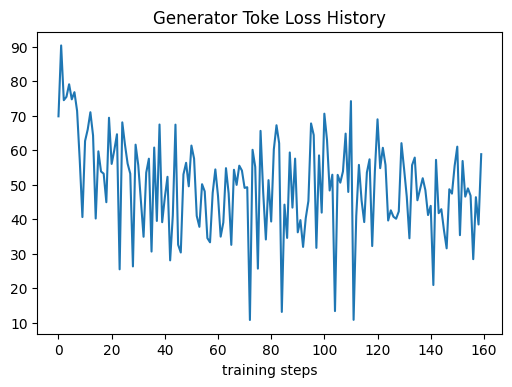

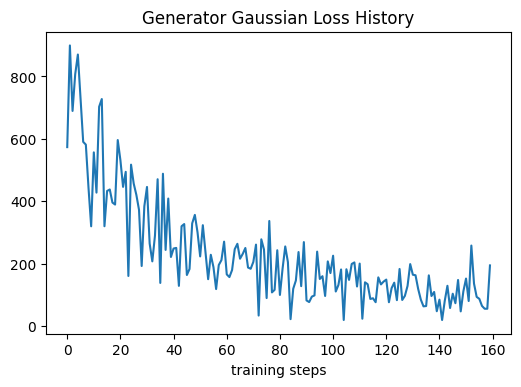

In [13]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

Text(0.5, 0, 'training steps')

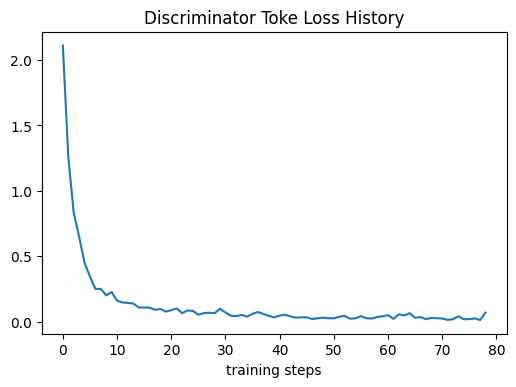

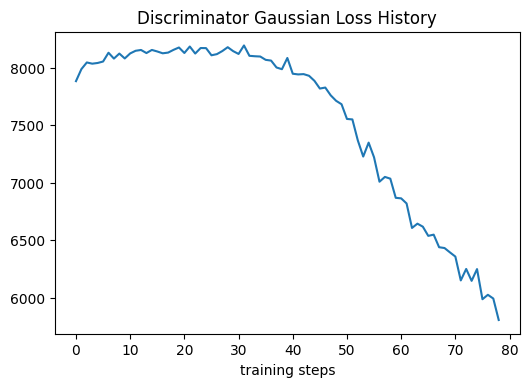

In [14]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [15]:
loss_save_dir = './experiment_results/after_1_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 1 epochs: Save G and D models

In [16]:
G_save_dir = './experiment_results/after_1_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [17]:
D_save_dir = './experiment_results/after_1_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 1 epochs: Generate sequences 

In [18]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 1/1000 [00:00<10:32,  1.58it/s]

0
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.522355525332786), (2.0, 7.522355525332786), (2.0, 8.522355525332786), (2.0, 20.93464178810698), (2.0, 22.76620868789735)]


 10%|█         | 101/1000 [01:02<09:09,  1.64it/s]

100
[(1.0, 0), (2.0, 1.0648077243652827), (3.0, 2.0648077243652825), (2.0, 3.0648077243652825), (3.0, 4.0648077243652825), (4.0, 5.0648077243652825), (4.0, 6.0648077243652825), (3.0, 7.0648077243652825), (4.0, 8.064807724365282), (2.0, 9.064807724365282), (2.0, 11.771319774994176)]


 20%|██        | 201/1000 [02:04<08:38,  1.54it/s]

200
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 4.0), (2.0, 5.0), (3.0, 12.773999463167922), (2.0, 13.773999463167922), (4.0, 15.162558579968973), (2.0, 16.85152752768327), (2.0, 17.85152752768327)]


 30%|███       | 301/1000 [03:06<07:06,  1.64it/s]

300
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (3.0, 3.0), (4.0, 4.0), (2.0, 5.0), (3.0, 6.0), (2.0, 7.0), (2.0, 9.678211380561669), (2.0, 11.68351574323242), (2.0, 14.326284404243587)]


 40%|████      | 401/1000 [04:08<06:05,  1.64it/s]

400
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 4.0), (2.0, 5.0), (2.0, 6.0), (3.0, 7.0), (3.0, 9.140951688409036), (4.0, 10.317770409616354), (2.0, 12.157989443879336)]


 50%|█████     | 501/1000 [05:10<05:08,  1.62it/s]

500
[(1.0, 0), (4.0, 1.0), (3.0, 2.0), (2.0, 3.0), (2.0, 4.0), (4.0, 5.0), (2.0, 6.750253758545078), (3.0, 8.545344026650861), (2.0, 10.20591745633466), (2.0, 11.268265064009112), (4.0, 12.268265064009112)]


 60%|██████    | 601/1000 [06:12<04:01,  1.65it/s]

600
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (3.0, 6.0), (3.0, 7.11708088051308), (3.0, 8.117080880513079), (2.0, 9.40101507116131), (4.0, 10.40101507116131)]


 70%|███████   | 701/1000 [07:13<03:01,  1.64it/s]

700
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (3.0, 3.0), (2.0, 4.0), (4.0, 5.0), (3.0, 6.0), (3.0, 7.0), (4.0, 8.0), (4.0, 20.805561845930495), (2.0, 30.87226928392493)]


 80%|████████  | 801/1000 [08:14<02:01,  1.63it/s]

800
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (3.0, 3.0), (4.0, 4.0), (2.0, 5.0), (2.0, 6.511597165473519), (3.0, 7.511597165473519), (3.0, 9.039851355033113), (2.0, 10.282362963653238), (4.0, 11.282362963653238)]


 90%|█████████ | 901/1000 [09:15<01:01,  1.62it/s]

900
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 4.0), (2.0, 5.301547678685793), (4.0, 6.301547678685793), (2.0, 7.301547678685793), (4.0, 9.142530164953548), (2.0, 10.142530164953548), (2.0, 13.370960132135679)]


100%|██████████| 1000/1000 [10:16<00:00,  1.62it/s]


In [19]:
generated_seqs_save_dir = './experiment_results/after_1_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

# Continue Training G and D for 3 more epochs, in total 4

In [21]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=3,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1
N_total = train_features[0].shape[0]
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 3)

In [ ]:
step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1


1it [01:50, 110.04s/it]

Training Step: 2


2it [03:36, 109.11s/it]

Training Step: 3


4it [07:11, 108.05s/it]

Training Step: 5


## 4 epochs: Loss over training

Text(0.5, 0, 'training steps')

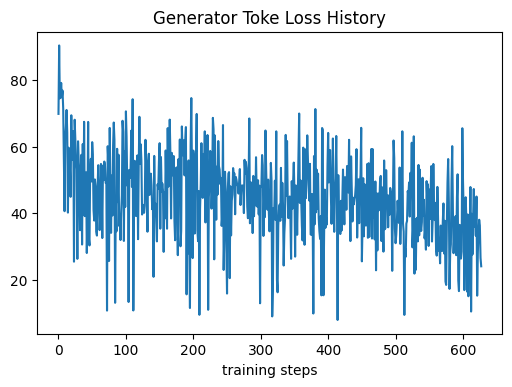

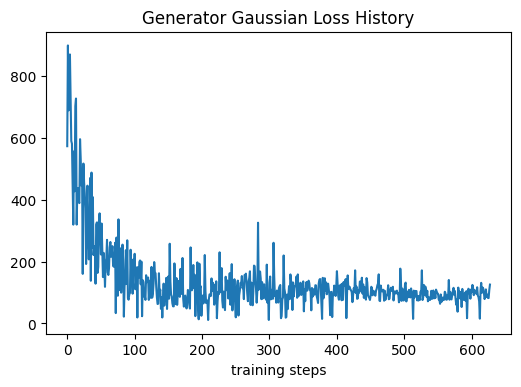

In [23]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

Text(0.5, 0, 'training steps')

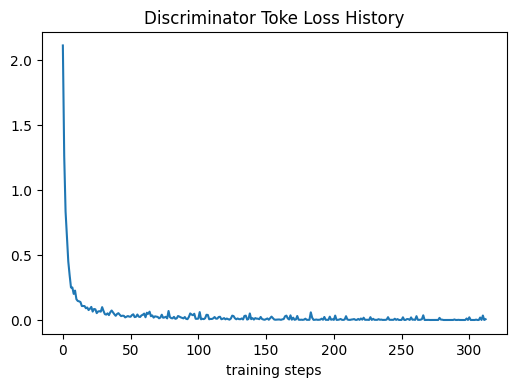

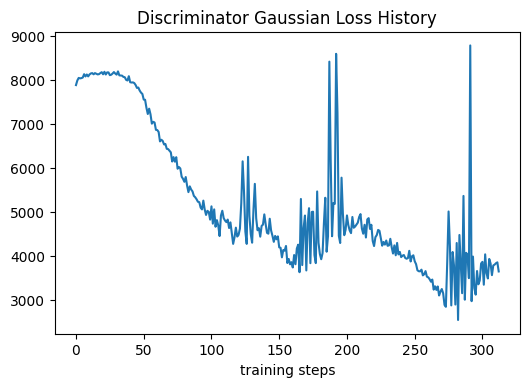

In [24]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [25]:
loss_save_dir = './experiment_results/after_4_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 4 epochs: Save G and D models

In [26]:
G_save_dir = './experiment_results/after_4_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [27]:
D_save_dir = './experiment_results/after_4_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 4 epochs: Generate sequences 

In [28]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 1/1000 [00:00<10:20,  1.61it/s]

0
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 8.300068884392246), (3.0, 13.13030640258457), (2.0, 14.13030640258457), (2.0, 16.057874525744193), (2.0, 17.548803307747313), (2.0, 19.22763865364851)]


 10%|█         | 101/1000 [01:01<08:59,  1.67it/s]

100
[(1.0, 0), (2.0, 1.0), (2.0, 3.879724880940596), (2.0, 4.879724880940596), (2.0, 5.879724880940596), (2.0, 6.879724880940596), (3.0, 8.13588542473586), (2.0, 9.9785203979809), (3.0, 12.763172418565773), (3.0, 15.206749450099686), (2.0, 16.206749450099686)]


 20%|██        | 201/1000 [02:01<08:05,  1.65it/s]

200
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (3.0, 10.74879718610072), (2.0, 11.74879718610072), (2.0, 12.859486454109682), (2.0, 13.859486454109682), (2.0, 15.515588791144067)]


 30%|███       | 301/1000 [03:02<07:00,  1.66it/s]

300
[(1.0, 0), (2.0, 1.0), (3.0, 5.016144522446119), (2.0, 6.016144522446119), (4.0, 8.891036827639162), (2.0, 10.44379528089869), (2.0, 11.44379528089869), (2.0, 12.44379528089869), (2.0, 14.304341961772838), (4.0, 15.304341961772838), (2.0, 16.30434196177284)]


 40%|████      | 401/1000 [04:02<05:57,  1.68it/s]

400
[(1.0, 0), (2.0, 1.0), (2.0, 2.7105053874083413), (2.0, 3.7105053874083413), (2.0, 4.710505387408341), (2.0, 10.337890033286682), (2.0, 11.337890033286682), (2.0, 12.337890033286682), (2.0, 17.259865431589386), (3.0, 19.060257419594514), (4.0, 20.060257419594514)]


 50%|█████     | 501/1000 [05:01<04:56,  1.68it/s]

500
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.0), (4.0, 7.0), (2.0, 8.0), (2.0, 9.0), (2.0, 11.557169448634514)]


 60%|██████    | 601/1000 [06:02<03:56,  1.68it/s]

600
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (4.0, 5.0), (2.0, 6.034487085688928), (4.0, 7.034487085688928), (2.0, 13.479057488183868), (2.0, 14.479057488183868), (2.0, 16.390683870811987)]


 70%|███████   | 701/1000 [07:02<03:01,  1.65it/s]

700
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 4.0), (2.0, 5.0), (2.0, 8.850464391535002), (2.0, 9.850464391535002), (2.0, 10.850464391535002), (2.0, 11.850464391535002), (2.0, 12.937057859603469)]


 80%|████████  | 801/1000 [08:02<01:59,  1.66it/s]

800
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (3.0, 6.0), (2.0, 8.337097768303462), (2.0, 9.337097768303462), (2.0, 10.569382869315787), (2.0, 11.569382869315787)]


 90%|█████████ | 901/1000 [09:02<00:58,  1.69it/s]

900
[(1.0, 0), (2.0, 1.2996864304805964), (2.0, 2.2996864304805964), (2.0, 3.2996864304805964), (2.0, 4.299686430480596), (2.0, 5.299686430480596), (3.0, 6.299686430480596), (2.0, 7.299686430480596), (2.0, 9.182490758114326), (2.0, 10.654011211777835), (2.0, 11.654011211777835)]


100%|██████████| 1000/1000 [10:02<00:00,  1.66it/s]


In [29]:
generated_seqs_save_dir = './experiment_results/after_4_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

# Continue Training G and D for 4 more epochs, in total 8

In [31]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=4,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1
N_total = train_features[0].shape[0]

_TOTAL_STEPS = int(N_total / BATCH_SIZE * 4)

In [ ]:
step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1


1it [01:46, 106.42s/it]

Training Step: 2


## 8 epochs: Loss over training 

Text(0.5, 0, 'training steps')

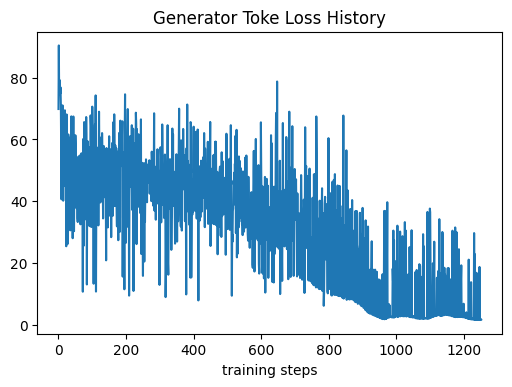

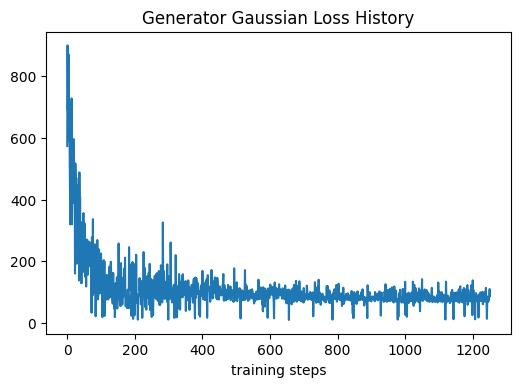

In [34]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

Text(0.5, 0, 'training steps')

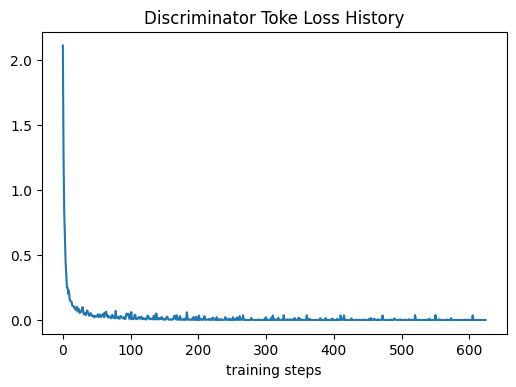

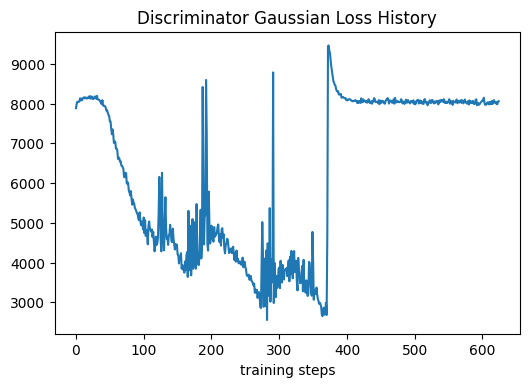

In [35]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [36]:
loss_save_dir = './experiment_results/after_8_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 8 epochs: save G and D

In [37]:
G_save_dir = './experiment_results/after_8_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [38]:
D_save_dir = './experiment_results/after_8_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 8 epochs: Generate Sequences

In [39]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 1/1000 [00:00<09:36,  1.73it/s]

0
[(1.0, 0), (2.0, 1.6404339468004383), (2.0, 2.9248481894227596), (2.0, 7.768102326606028), (3.0, 8.768102326606028), (2.0, 9.768102326606028), (2.0, 10.768102326606028), (2.0, 11.768102326606028), (2.0, 12.768102326606028), (2.0, 13.768102326606028), (2.0, 15.119060795986758)]


 10%|█         | 101/1000 [00:55<08:10,  1.83it/s]

100
[(1.0, 0), (2.0, 1.0), (2.0, 3.9366689612004238), (2.0, 4.936668961200423), (2.0, 7.2154627240824745), (2.0, 8.215462724082474), (2.0, 9.215462724082474), (2.0, 10.215462724082474), (2.0, 11.215462724082474), (2.0, 12.71310639598679), (2.0, 13.71310639598679)]


 20%|██        | 201/1000 [01:51<07:24,  1.80it/s]

200
[(1.0, 0), (4.0, 1.0), (3.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.0), (2.0, 7.0), (2.0, 8.16568261690648), (2.0, 11.872641049643514), (2.0, 12.872641049643514)]


 30%|███       | 301/1000 [02:46<06:27,  1.81it/s]

300
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.711148203074403), (2.0, 5.711148203074403), (2.0, 6.711148203074403), (2.0, 7.711148203074403), (2.0, 8.725608934263708), (2.0, 9.725608934263708), (2.0, 11.747339118234512), (2.0, 12.747339118234512)]


 40%|████      | 401/1000 [03:41<05:26,  1.84it/s]

400
[(1.0, 0), (2.0, 1.297398927387236), (2.0, 2.2973989273872357), (2.0, 3.2973989273872357), (2.0, 4.297398927387236), (2.0, 5.297398927387236), (2.0, 7.161157674857861), (2.0, 8.653370155201685), (2.0, 9.653370155201685), (2.0, 13.12512105895512), (2.0, 14.566759562422593)]


 50%|█████     | 501/1000 [04:36<04:30,  1.84it/s]

500
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.452806155166627), (2.0, 8.058144115851135), (2.0, 9.058144115851135), (2.0, 10.14674455509857), (2.0, 11.39691411306546)]


 60%|██████    | 601/1000 [05:31<03:42,  1.79it/s]

600
[(1.0, 0), (3.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 8.500887423147784), (2.0, 9.500887423147784), (2.0, 11.478455387824209), (2.0, 12.478455387824209), (2.0, 13.684552017599719), (2.0, 15.012914329847664), (2.0, 16.892725478368526)]


 70%|███████   | 701/1000 [06:27<02:46,  1.80it/s]

700
[(1.0, 0), (2.0, 1.0), (3.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.0), (2.0, 7.0), (2.0, 8.354617166018297), (2.0, 9.354617166018297), (2.0, 11.202777963619019)]


 80%|████████  | 801/1000 [07:23<01:55,  1.73it/s]

800
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0), (2.0, 6.221022036219697), (2.0, 7.221022036219697), (2.0, 9.964266410669858), (2.0, 11.567748042340096), (2.0, 13.175923077526978)]


 90%|█████████ | 901/1000 [08:19<00:55,  1.79it/s]

900
[(1.0, 0), (2.0, 1.623272978629078), (2.0, 2.6232729786290783), (2.0, 3.6232729786290783), (2.0, 4.623272978629078), (2.0, 5.623272978629078), (2.0, 6.623272978629078), (2.0, 8.812845977797618), (2.0, 9.86133075154811), (2.0, 11.274409794605575), (2.0, 13.672117684302913)]


100%|██████████| 1000/1000 [09:14<00:00,  1.80it/s]


In [ ]:
generated_seqs_save_dir = './experiment_results/after_8_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Continue Training G and D for 8 more epochs, in total 22, but change G : D ratio to 8 : 1

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=8,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 8
_D_STEPS = 1
N_total = train_features[0].shape[0]

In [ ]:
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 8)

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

 ## 22 epochs: Loss over training 

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_22_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 22 epochs: save G and D

In [ ]:
G_save_dir = './experiment_results/after_22_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_22_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 22 epochs: Generate Sequences

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_22_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Continue Training G and D for 2 more epochs, in total 24, change G : D ratio to 16 : 1，and exphasize on minimizing G token loss

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=8,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-6
_G_STEPS = 16
_D_STEPS = 1
N_total = train_features[0].shape[0]

In [ ]:
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 2)

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

## 24 epochs: Loss over training 

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_24_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 24 epochs: save G and D

In [ ]:
G_save_dir = './experiment_results/after_24_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_24_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 24 epochs: Generate Sequences

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_24_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Problem with Generator 

1. Token Loss not decrease significantly
2. Gaussian Loss decay is good, but the range of generated time stamps is small

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.layers import Input, LSTM, Embedding, Reshape, Dense
# import tensorflow_probability as tfp
# from tensorflow_probability import distributions as tfd

# from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

# tf.keras.backend.set_floatx('float64')

# def train_generator_test(generator, discriminator, T, event_vocab_dim, verbose=False, weight_gaussian_loss=1,
#                     optimizer=Adam(lr=0.001)):
#     with tf.GradientTape() as tape:
#         states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout_test(generator,
#                                                                                                    T, event_vocab_dim,
#                                                                                                    verbose=verbose)
#         actual_length = episode_token_probs.shape[0]

#         gaussian_log = gaussian_log[0, 0:actual_length, 0]
#         true_prob, _, _ = discriminator((states_et, states_ts))
#         token_loss = -tf.reduce_sum(tf.math.log(episode_token_probs) * true_prob)
#         gaussian_loss = -tf.reduce_sum(gaussian_log * true_prob)
#         generator_loss = token_loss + weight_gaussian_loss * gaussian_loss

#         if verbose:
#             print('generator token loss:{}'.format(token_loss))
#             print('generator gaussian loss:{}'.format(gaussian_loss))
#             print('total generator loss:{}'.format(generator_loss / actual_length))

#     grads = tape.gradient(generator_loss, generator.trainable_variables)
# #     print(grads)
    
#     optimizer.apply_gradients(zip(grads, generator.trainable_variables))

#     return token_loss, gaussian_loss


# def generate_one_sequence_by_rollout_test(generator, T, event_vocab_dim, end_token=0, init_token=1, max_time=1024, verbose=False):
#     # Begin from dummy init state (init_token=1, init_timestamp=0.0)
#     curr_state_et = np.zeros([T])
#     curr_state_et[0] = init_token
#     curr_state_et = curr_state_et.reshape((1, T, 1))

#     curr_state_ts = np.zeros([T])
#     curr_state_ts[0] = 0.0
#     curr_state_ts = curr_state_ts.reshape((1, T, 1))

#     # whole trajectory
#     states_et = (curr_state_et)
#     states_ts = (curr_state_ts)
#     episode_token_probs = tf.constant([1., ], dtype=tf.float64)

#     for step in range(1, T):  # sequence length
#         token_prob, gaussian_log, mask, alpha, mu, sigma = generator([curr_state_et, curr_state_ts])
        
#         print('alpha', alpha)
#         print('mu', mu)
#         print('sigma', sigma)
        
#         # generate one timstamp using [alpha, mu, sigma]
#         gm = tfd.MixtureSameFamily(
#             mixture_distribution=tfd.Categorical(
#                 probs=alpha),
#             components_distribution=tfd.Normal(
#                 loc=mu,
#                 scale=sigma))

#         # sample next event token and time stamp
#         sampled_et = tf.random.categorical(token_prob, num_samples=1)
#         sampled_ts = tf.clip_by_value(gm.sample(), clip_value_min=1, clip_value_max=max_time)  # shape=[BATCH_SIZE,]

#         taken_action_idx = sampled_et.numpy().item()

#         if taken_action_idx == end_token:
#             if verbose:
#                 print('Generation ended early!')
#             break  # episode is over

#         taken_action_prob = token_prob[0][taken_action_idx]
#         taken_action_prob = tf.reshape(taken_action_prob, [1, ])
#         episode_token_probs = tf.concat([episode_token_probs, taken_action_prob], axis=0)

#         new_state_et = np.copy(curr_state_et)
#         new_state_ts = np.copy(curr_state_ts)

#         # TODO: 0 means 1 generation per batch
#         new_state_et[0, step, :] = sampled_et
#         new_state_ts[0, step, :] = sampled_ts

#         if verbose:
#             print('new_state_et', tf.squeeze(new_state_et))

#         states_et = np.concatenate((states_et, new_state_et))
#         states_ts = np.concatenate((states_ts, new_state_ts))

#         curr_state_et = new_state_et
#         curr_state_ts = new_state_ts
#         if verbose:
#             print('Generation done!')

#     if verbose:
#         print('episode length={}'.format(step + 1))
#         print('state_et =', states_et)
#         print('state_ts =', states_ts)
#         print('episode_token_probs =', episode_token_probs)
#         print('gaussian_log =', gaussian_log)

#     return states_et, states_ts, episode_token_probs, gaussian_log

In [ ]:
# _TOTAL_STEPS = 1

# step = 0

# for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
#     step += 1
#     print('Training Step:', step)

#     # train the generator
#     for _ in range(_G_STEPS):
#         gen_token_loss, gen_gaussian_loss = train_generator_test(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
#         gen_token_loss_history.append(gen_token_loss.numpy())
#         gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
#     # train the discriminator
#     for _ in range(_D_STEPS):
#         disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
#         disc_token_loss_history.append(disc_token_loss.numpy())
#         disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())